In [4]:
import qiskit
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")
qasm_simulator = qiskit.Aer.get_backend("qasm_simulator")

def do_job (circuit):
    result = qiskit.execute(circuit, backend = statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure ([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = qiskit.execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

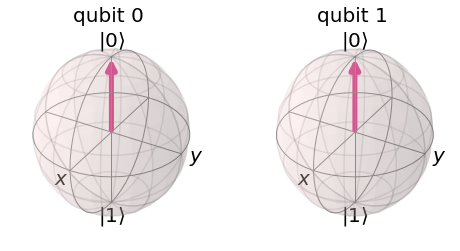

In [6]:
circuit = qiskit.QuantumCircuit (2, 2)
statevec, counts = do_job (circuit)

plot_bloch_multivector(statevec)

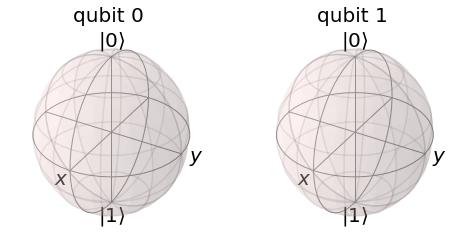

In [15]:
circuit = qiskit.QuantumCircuit (2, 2)
circuit.h(0)

circuit.cx(0, 1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

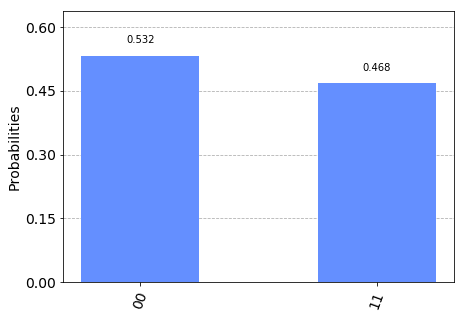

In [16]:
plot_histogram([counts])

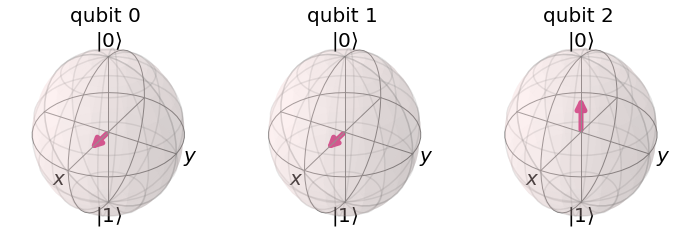

In [18]:
circuit = qiskit.QuantumCircuit (3, 3)
circuit.h(0)
circuit.h(1)

circuit.ccx(0, 1, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

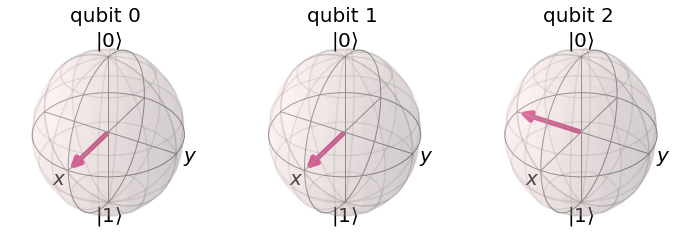

In [44]:
# Rotations

from math import pi

circuit = qiskit.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
# circuit.ccx(0, 1, 2)
circuit.rx(pi / 2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector (statevec)

plot_histogram([counts])

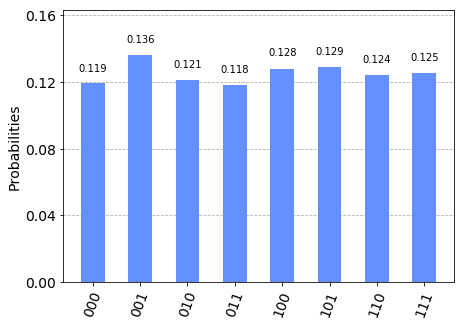

In [45]:
plot_histogram([counts])

In [46]:
circuit.draw()

┌───┐    ┌─┐      
q_0: |0>───┤ H ├────┤M├──────
           ├───┤    └╥┘┌─┐   
q_1: |0>───┤ H ├─────╫─┤M├───
        ┌──┴───┴───┐ ║ └╥┘┌─┐
q_2: |0>┤ Rx(pi/2) ├─╫──╫─┤M├
        └──────────┘ ║  ║ └╥┘
 c_0: 0 ═════════════╩══╬══╬═
                        ║  ║ 
 c_1: 0 ════════════════╩══╬═
                           ║ 
 c_2: 0 ═══════════════════╩═